In [1]:
# Loading and importing the necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import sys
import pandas as pd
import pickle as pkl
import scipy
from scipy.special import chebyt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches



In [2]:
chebychv_coeffs = [ 9.5096e+07, -3.5145e+01, -7.7450e+08,  2.5542e+02,  2.8665e+09, -8.3612e+02
 -6.3796e+09,  1.6289e+03,  9.5215e+09, -2.1025e+03, -1.0062e+10,  1.8941e+03,
  7.7490e+09, -1.2221e+03, -4.4090e+09,  5.7039e+02,  1.8592e+09 ,-1.9221e+02,
 -5.7760e+08,  4.6165e+01,  1.3022e+08, -7.7084e+00 ,-2.0761e+07 , 8.5898e-01,
  2.2477e+06, -5.9839e-02, -1.5522e+05 , 2.3338e-03  ,6.1781e+03, -4.1408e-05,
 -1.1822e+02,  2.6645e-07,  7.2350e-01,]

chebychv_coeffs1 = [ 4.11901474e-01, -2.51722336e-01,  1.31587982e-01, -5.76591492e-02,
  2.06947327e-02, -5.90896606e-03,  1.28841400e-03, -2.01225281e-04,
  2.00271606e-05, -9.53674316e-07,  0.00000000e+00, -0.00000000e+00,
  0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
  0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]

In [3]:
# Loading and importing the necessary libraries
import numpy as np
import scipy
from decimal import *
from scipy.special import chebyt

def optpoly_eigenstatefiltering(x, l, Delta):
  
    arg_top = -1 + 2*((x**2 - Delta**2)/(1-Delta**2))
    arg_bot = -1 + 2*((- Delta**2)/(1-Delta**2))
    cheb_l = scipy.special.chebyt(l)
    print("arg_top", arg_top)
    print("arg_bot", arg_bot)
    print("cheb_l", cheb_l)
    print("cheb_l(arg_top)", cheb_l(arg_top))
    print("cheb_l(arg_bot)", cheb_l(arg_bot))
    return cheb_l(arg_top)/cheb_l(arg_bot)

vpoly = np.vectorize(optpoly_eigenstatefiltering)

def optpoly_eigenstatefiltering_CIMP(x, M, a):
    arg_top = (2*x**2 - (1 + a**2))/(1-a**2)
    arg_bot = -(1+a**2)/(1-a**2)
    cheb_M = scipy.special.chebyt(M)
    return cheb_M(arg_top)/cheb_M(arg_bot)

vpoly = np.vectorize(optpoly_eigenstatefiltering)


def chebyshevApprox(x, n, coeffs):
    """
    Compute the Chebyshev polynomial approximation of a function at point x
    using the first n Chebyshev coefficients.
    """
    sumval = 0
    for j in range(0, n):
        sumval += coeffs[j] * scipy.special.chebyt(2*j+1)(x)
    return sumval * 4

def computeChebCoeffs(nCheb, b0):
    """
    Compute Chebyshev coefficients for the polynomial approximation of the
    function 1/(1-x) using Chebyshev polynomials of the first kind.
    """
    # Set the precision for Decimal calculations
    chebCoeffs = np.zeros(nCheb)
    for j in range(0, nCheb):
        sumval = Decimal(0.0)
        for i in range(j+1, b0+1):
            sumval += Decimal(scipy.special.binom((2*b0), b0+i))
        sign = -1
        if (j%2==0):
            sign=1
        chebCoeffs[j] = sign * sumval / Decimal((2**Decimal(2*b0)))
    return chebCoeffs

In [4]:
def computechebcoeffx():
    'compute chebyshev coefficients for y = x'
    coeffs = np.zeros(2)
    coeffs[0] = 1
    coeffs[1] = 0
    return coeffs



In [5]:
print(computeChebCoeffs(20, 20))

[ 4.37314656e-01 -3.17914001e-01  2.14795254e-01 -1.34093626e-01
  7.69299721e-02 -4.03452339e-02  1.92386541e-02 -8.29450169e-03
  3.21328805e-03 -1.11071689e-03  3.39774127e-04 -9.10829149e-05
  2.11385113e-05 -4.18229229e-06  6.91306013e-07 -9.28512236e-08
  9.73250280e-09 -7.46695150e-10  3.72892828e-11 -9.09494702e-13]


In [6]:

alpha =  1.8510241683485202
# Set the shift parameter and the gap
lam = -0.93
minEne = 0
delta =0.28  # optimal value of delta (smaller than the the 1/sqrt(2))
delta_scaled = delta/(2*alpha)  # scaling the delta so that we can do qsp


arg_top [1.         0.995979   0.99196202 ... 0.99196202 0.995979   1.        ]
arg_bot -1.0115067689079393
cheb_l      8             7       6             5       4             3      2
128 x + 1.421e-14 x - 256 x - 1.137e-13 x + 160 x - 4.619e-14 x - 32 x + 4.441e-16 x + 1
cheb_l(arg_top) [1.         0.75334769 0.52761246 ... 0.52761246 0.75334769 1.        ]
cheb_l(arg_bot) 1.8295989052173782
arg_top [1.         0.995979   0.99196202 ... 0.99196202 0.995979   1.        ]
arg_bot -1.0115067689079393
cheb_l            16             15             14             13
3.277e+04 x  + 3.638e-12 x  - 1.311e+05 x  + 2.037e-10 x 
             12             11             10             9
 + 2.13e+05 x  + 6.694e-10 x  - 1.802e+05 x  + 3.201e-10 x
              8             7            6             5        4
 + 8.448e+04 x + 5.457e-11 x - 2.15e+04 x + 9.095e-12 x + 2688 x
             3       2
 + 4.69e-13 x - 128 x + 4.441e-16 x + 1
cheb_l(arg_top) [ 1.          0.13506549 -0.44325019 ...

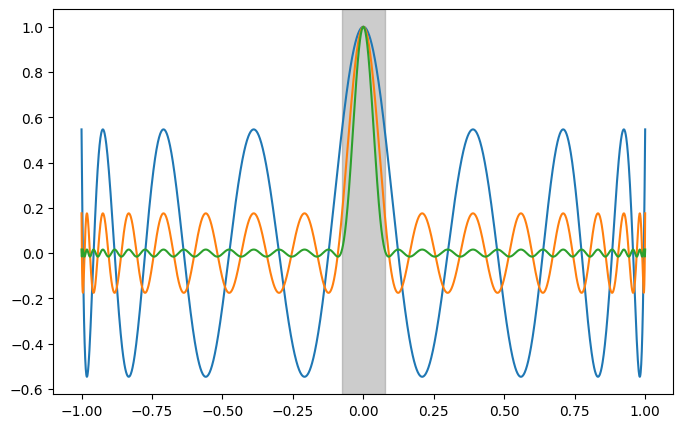

In [7]:

x_range = np.arange(-1,1.001,0.001)

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.axvspan(-delta_scaled, delta_scaled, color='gray', alpha=0.4)
delta_patch = mpatches.Patch(color='gray',  alpha=0.4, label=r'$\Delta = \pm$'+ str(delta_scaled))
colorit = 0
for i in 8,16,32:
  color = "C"+str(colorit)
  colorit +=1
  ax1.plot(x_range, optpoly_eigenstatefiltering(x_range,i,delta_scaled), color=color, label="Deg. "+ r'$d=$' + str(i))

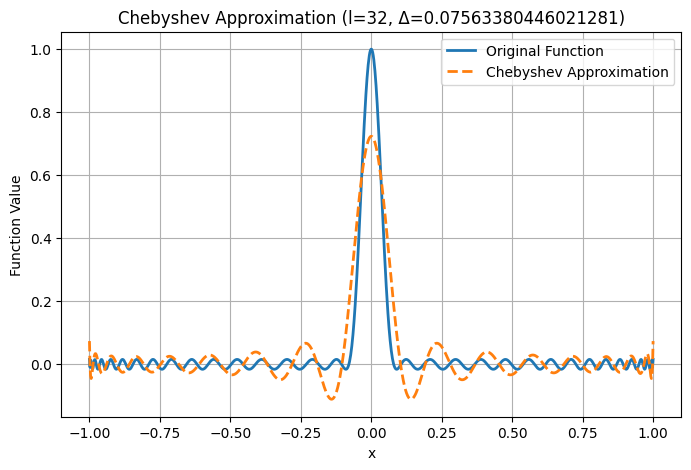

Chebyshev Coefficients: [ 2.58723703e-02  0.00000000e+00 -4.86861527e-02 -8.21691918e-17
  5.14512892e-02 -1.02234432e-16 -4.79258177e-02 -4.10476367e-17
  5.05873942e-02 -3.09767113e-17 -4.64158690e-02  1.27487796e-17
  4.92037958e-02 -3.37341330e-18 -4.41726616e-02 -6.18483780e-18
  4.73911681e-02 -2.10883860e-17 -4.12044478e-02  2.22202765e-17
  4.52972438e-02  3.59104225e-18 -3.74753065e-02  4.89994000e-17
  4.31835237e-02  5.94403794e-18 -3.27855041e-02  4.46249664e-17
  4.16726417e-02  6.09413187e-18 -2.61285120e-02  2.97048637e-17
  4.39064876e-02]


In [8]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev

def optpoly_eigenstatefiltering(x, l, Delta):
    arg_top = -1 + 2*((x**2 - Delta**2)/(1-Delta**2))
    arg_bot = -1 + 2*((- Delta**2)/(1-Delta**2))
    cheb_l = scipy.special.chebyt(l)
    return cheb_l(arg_top) / cheb_l(arg_bot)

# Parameters
l = 32        # Degree of Chebyshev polynomial
Delta = 0.5  # Example Delta

# Generate sample points in [-1,1]
x_samples = np.linspace(-1, 1, 1000)
y_samples = optpoly_eigenstatefiltering(x_samples, l, delta_scaled)

# Fit Chebyshev polynomial
cheb_coeffs = np.polynomial.chebyshev.chebfit(x_samples, y_samples, l)

# Construct Chebyshev polynomial from coefficients
cheb_poly = Chebyshev(cheb_coeffs)

# Evaluate the Chebyshev polynomial
y_cheb_approx = cheb_poly(x_samples)

# Plot the original function and its Chebyshev approximation
plt.figure(figsize=(8, 5))
plt.plot(x_samples, y_samples, label="Original Function", linewidth=2)
plt.plot(x_samples, y_cheb_approx, label="Chebyshev Approximation", linestyle="--", linewidth=2)
plt.xlabel("x")
plt.ylabel("Function Value")
plt.title(f"Chebyshev Approximation (l={l}, Δ={delta_scaled})")
plt.legend()
plt.grid()
plt.show()

print("Chebyshev Coefficients:", cheb_coeffs)


In [9]:
import numpy as np
from scipy.fftpack import dct
from scipy.special import chebyt

def optpoly_eigenstatefiltering(x, l, Delta):
    arg_top = -1 + 2 * (x**2 - Delta**2) / (1 - Delta**2)
    arg_bot = -1 + 2 * (-Delta**2) / (1 - Delta**2)
    cheb_l = chebyt(l)
    return cheb_l(arg_top) / cheb_l(arg_bot)

def get_chebyshev_coefficients(l, Delta, N=1000):
    """
    Compute the Chebyshev coefficients of the polynomial defined by optpoly_eigenstatefiltering(x, l, Delta).
    
    Args:
        l (int): Degree parameter of the eigenstate filtering polynomial.
        Delta (float): Gap parameter.
        N (int, optional): Number of Chebyshev nodes to sample. Should be sufficiently large for accuracy.
    
    Returns:
        np.ndarray: Chebyshev coefficients [c_0, c_1, ..., c_{2l}].
    """
    # Generate Chebyshev nodes (roots of T_N(x)) in the interval [-1, 1]
    k = np.arange(N)
    theta = (2 * k + 1) * np.pi / (2 * N)
    x = np.cos(theta)
    
    # Evaluate the polynomial at the Chebyshev nodes
    f_vals = optpoly_eigenstatefiltering(x, l, Delta)
    
    # Compute the DCT-II of the sampled values
    dct_coeffs = dct(f_vals, type=2, norm='ortho')
    
    # Scale the coefficients to obtain the Chebyshev expansion coefficients
    # The DCT-II with 'ortho' norm includes a scaling factor that we adjust
    cheb_coeffs = dct_coeffs * np.sqrt(2 / N)
    cheb_coeffs[0] /= np.sqrt(2)  # Correct the scaling for c_0
    
    # Truncate to retain coefficients up to degree 2l (polynomial is of degree 2l)
    cheb_coeffs = cheb_coeffs[:2 * l + 1]
    
    return cheb_coeffs

# Example usage:
l = 32      # Degree parameter for the Chebyshev polynomial
Delta =delta_scaled
coefficients = get_chebyshev_coefficients(l, Delta)
print("Chebyshev coefficients:", coefficients)

Chebyshev coefficients: [ 2.51315521e-02  7.69217330e-18 -5.01786378e-02  1.42139722e-17
  4.99259332e-02  1.27374435e-18 -4.95070669e-02  2.22186696e-17
  4.89254731e-02 -9.83820899e-18 -4.81859048e-02  2.69027607e-17
  4.72943794e-02 -2.28026284e-17 -4.62581106e-02  2.99954140e-17
  4.50854266e-02 -3.09214291e-17 -4.37856766e-02  3.72815741e-17
  4.23691258e-02 -3.71765245e-17 -4.08468414e-02  4.06807371e-17
  3.92305708e-02 -4.48631242e-17 -3.75326126e-02  4.97694871e-17
  3.57656836e-02 -4.17311617e-17 -3.39427834e-02  5.45242718e-17
  3.20770565e-02 -5.16250556e-17 -3.01816559e-02  5.71768874e-17
  2.82696096e-02 -5.15188923e-17 -2.63536897e-02  6.55616290e-17
  2.44462883e-02 -5.63015361e-17 -2.25593001e-02  7.10152855e-17
  2.07040136e-02 -6.03297029e-17 -1.88910122e-02  6.59682456e-17
  1.71300855e-02 -6.66407846e-17 -1.54301532e-02  7.96444774e-17
  1.37992011e-02 -6.05507868e-17 -1.22442298e-02  7.49583168e-17
  1.07712176e-02 -6.94524553e-17 -9.38509572e-03  8.48742301e-17
 

Chebyshev coefficients for y=x: [ 1.56776415e-18  1.00000000e+00 -1.64364321e-16]


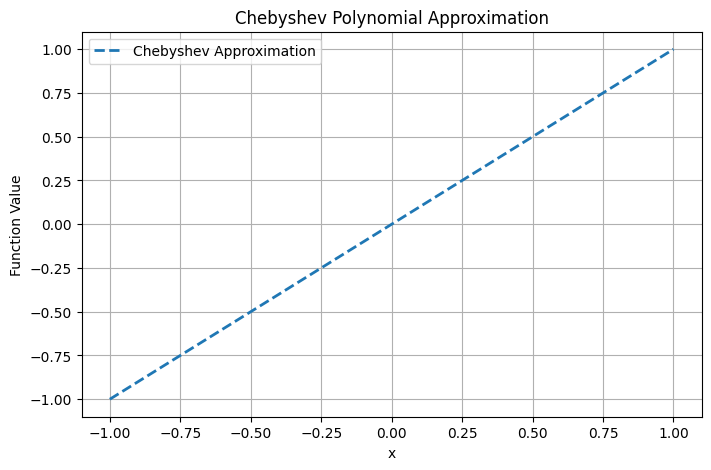

In [10]:
# construct a fucntion y = x and get the coefficients for it 

def coef():
    x = np.linspace(-1, 1, 1000)
    y = x
    coeffs = np.polynomial.chebyshev.chebfit(x, y, 2)
    return coeffs

coeffs = coef()
print("Chebyshev coefficients for y=x:", coeffs)

# Plotting the Chebyshev polynomial approximation
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev

def plot_chebyshev_approximation(coeffs, x_range):
    """
    Plot the Chebyshev polynomial approximation.
    
    Args:
        coeffs (np.ndarray): Chebyshev coefficients.
        x_range (np.ndarray): Range of x values for plotting.
    """
    cheb_poly = Chebyshev(coeffs)
    y_approx = cheb_poly(x_range)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x_range, y_approx, label="Chebyshev Approximation", linestyle="--", linewidth=2)
    plt.xlabel("x")
    plt.ylabel("Function Value")
    plt.title("Chebyshev Polynomial Approximation")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
x_range = np.linspace(-1, 1, 1000)
plot_chebyshev_approximation(coeffs, x_range)






In [11]:
np.log(-2 + 0j)

np.complex128(0.6931471805599453+3.141592653589793j)

In [17]:
# for y = x
# print(coefficients)
from qsp import chebqsp_solve
# coefs = coef_list
# print(coefs)
coeffs = coefficients
alpha = .991  # Adjust based on your needs
scaled_coeffs = [ck * alpha for ck in coeffs]
k = chebqsp_solve(scaled_coeffs)
print(k.polynomials()[0])
print(k.polynomials()[1])
print(k.phi)

[np.float64(0.024905368148450565), np.float64(7.62294373696862e-18), np.float64(-0.04972703004356514), np.float64(1.4086046401931675e-17), np.float64(0.049476599810586865), np.float64(1.2622806491175537e-18), np.float64(-0.049061503301446804), np.float64(2.2018701538661062e-17), np.float64(0.048485143870765544), np.float64(-9.749665104809015e-18), np.float64(-0.04775223167221549), np.float64(2.6660635860892455e-17), np.float64(0.04686873000908912), np.float64(-2.2597404772984858e-17), np.float64(-0.045841787617435154), np.float64(2.9725455258897817e-17), np.float64(0.044679657801048565), np.float64(-3.064313624151726e-17), np.float64(-0.04339160551305545), np.float64(3.694603994302915e-17), np.float64(0.04198780363770568), np.float64(-3.684193573362158e-17), np.float64(-0.0404792198659576), np.float64(4.031461051427216e-17), np.float64(0.038877495677424406), np.float64(-4.4459356104096624e-17), np.float64(-0.037194819037579305), np.float64(4.9321561759526265e-17), np.float64(0.03544379

/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/numerics/__init__.py:126: RuntimeWarning: invalid value encountered in log
  return __bd_wrapper.bd.log(x)
/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/riemann_hilbert.py:120: RuntimeWarning: invalid value encountered in scalar divide
  L_cols.append([upj/up[0] for upj in up])


In [13]:
from qsp import PhaseFactors

f = PhaseFactors(coeffs, )
print(f.polynomials()[0])
print(f.polynomials()[1])

(-0.0004643416643269659-8.348788129742874e-19j) z^0 + (-4.032528275681682e-18-2.0798599359265678e-20j) z^1 + (0.0010816301428200996+1.398894188235065e-17j) z^2 + (5.491811463203391e-18+1.2969113709717772e-19j) z^3 + (-0.0014114704314246076-3.494009921903245e-17j) z^4 + (-7.255872464834849e-18-3.8585887349037734e-19j) z^5 + (0.0017906073767306996-5.202318414416352e-18j) z^6 + (8.949140958482483e-18+7.250265583972454e-19j) z^7 + (-0.002221722520796363-4.7660896900900035e-17j) z^8 + (-1.1392980488270087e-17-1.0866357247316893e-18j) z^9 + (0.002707228793848497+1.8686970567358075e-18j) z^10 + (1.3545898079553714e-17+1.4872121905080139e-18j) z^11 + (-0.00324923630054871-2.1251905594794925e-17j) z^12 + (-1.6456893612252882e-17-1.7278053201598149e-18j) z^13 + (0.0038495236615838403+1.7856431771121077e-17j) z^14 + (1.939076492415067e-17+1.8642735906039564e-18j) z^15 + (-0.004509516014425599-9.197614839034279e-20j) z^16 + (-2.2114629051472213e-17-1.783710197816179e-18j) z^17 + (0.005230270647151

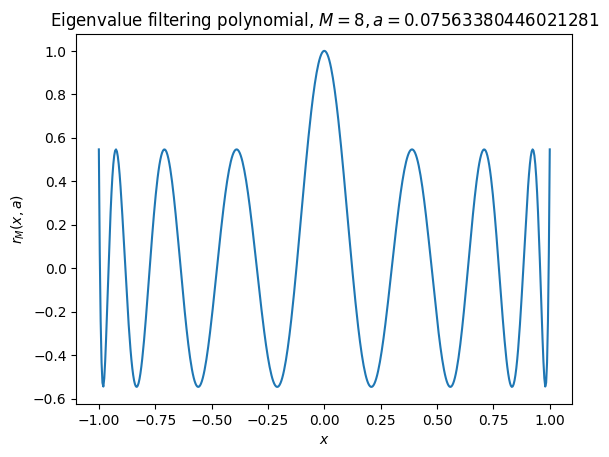

[ 0.28611863 -0.02618774  0.02716148 -0.02800427  0.02870688 -0.02926158
  0.02966225 -0.02990444  0.02998547 -0.02990444  0.02966225 -0.02926158
  0.02870688 -0.02800427  0.02716148 -0.02618774  0.28611863]


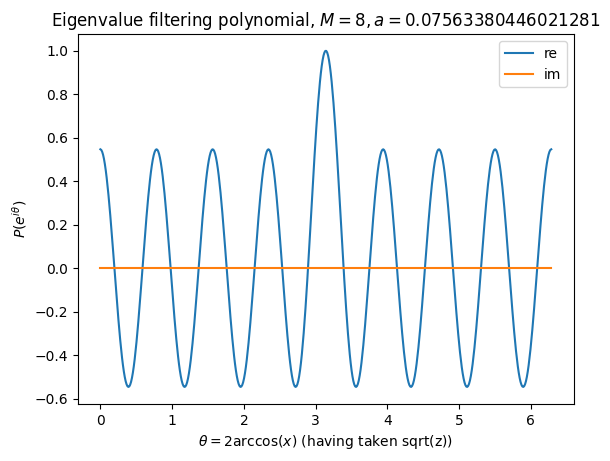

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def eval_chebyt(n, x):
    """Evaluate Chebyshev polynomial of the first kind at x."""
    if n < 0:
        raise ValueError("n must be non-negative")
    elif n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        T0 = np.ones_like(x)
        T1 = x
        for k in range(2, n + 1):
            T2 = 2 * x * T1 - T0
            T0, T1 = T1, T2
        return T2

coef_list = []
def eigenvalue_filtering_poly(M, a=delta_scaled, plot=True):
    """Find Chebyshev coefficients of eigenvalue filtering polynomial"""
    def r(x):
        "real poly with degree 2M"
        return eval_chebyt(M, (2*x**2-(1+a**2))/(1-a**2))/eval_chebyt(M, -(1+a**2)/(1-a**2))
   
 
    if plot:
        # Plot the function
        xs = np.linspace(-1, 1, 500)
        ys = r(xs)
        plt.plot(xs, ys)
        plt.title("Eigenvalue filtering polynomial, $M={}, a={}$".format(M, a))
        plt.xlabel("$x$")
        plt.ylabel("$r_M(x, a)$")
        plt.show()
   
    # Get the complex polynomial coefficients
    coef = np.polynomial.chebyshev.Chebyshev.interpolate(r, 2*M).coef 
    coef = coef[::2]
    coef[0] *= 2
    coef = 1/2 * np.concatenate([coef[::-1][:-1], coef])
    print(coef)
    coef_list.append(coef)
 
    if plot:
        # Plot complex polynomial
        poly = np.polynomial.Polynomial(coef)
        rads = np.linspace(0, 2*np.pi, 500)
        zs = np.exp(1j * rads)
        #xs = np.cos(rads)
        ys = poly(zs)/(zs**(M))
        plt.plot(rads, np.real(ys), label="re")
        plt.plot(rads, np.imag(ys), label="im")
        plt.ylabel("$P(e^{i\\theta})$")
        plt.xlabel("$\\theta = 2\\arccos(x)$ (having taken sqrt(z))")
        plt.title("Eigenvalue filtering polynomial, $M={}, a={}$".format(M, a))
        plt.legend()
        plt.show()

eigenvalue_filtering_poly(8, delta_scaled, plot=True)

In [15]:
c = [np.array([ 0.28611863, -0.02618774,  0.02716148, -0.02800427,  0.02870688,
       -0.02926158,  0.02966225, -0.02990444,  0.02998547, -0.02990444,
        0.02966225, -0.02926158,  0.02870688, -0.02800427,  0.02716148,
       -0.02618774,  0.28611863])]
print(c[0])
print(ck for ck in c[0])
for i in range(len(c[0])):
    print(c[0][i])
    

[ 0.28611863 -0.02618774  0.02716148 -0.02800427  0.02870688 -0.02926158
  0.02966225 -0.02990444  0.02998547 -0.02990444  0.02966225 -0.02926158
  0.02870688 -0.02800427  0.02716148 -0.02618774  0.28611863]
<generator object <genexpr> at 0x11832d780>
0.28611863
-0.02618774
0.02716148
-0.02800427
0.02870688
-0.02926158
0.02966225
-0.02990444
0.02998547
-0.02990444
0.02966225
-0.02926158
0.02870688
-0.02800427
0.02716148
-0.02618774
0.28611863


In [23]:
# for y = x
# print(coefficients)
from qsp import chebqsp_solve
coefs = coef_list
print(coefs)
coeffs = coefficients
alpha = 1  # Adjust based on your needs
scaled_coeffs = [ck * alpha for ck in coefs if np.any(ck)]
k = chebqsp_solve(scaled_coeffs)
print(k.polynomials()[0])
print(k.polynomials()[1])
print(k.phi)

[array([ 0.28611863, -0.02618774,  0.02716148, -0.02800427,  0.02870688,
       -0.02926158,  0.02966225, -0.02990444,  0.02998547, -0.02990444,
        0.02966225, -0.02926158,  0.02870688, -0.02800427,  0.02716148,
       -0.02618774,  0.28611863])]
[array([ 0.28611863, -0.02618774,  0.02716148, -0.02800427,  0.02870688,
       -0.02926158,  0.02966225, -0.02990444,  0.02998547, -0.02990444,
        0.02966225, -0.02926158,  0.02870688, -0.02800427,  0.02716148,
       -0.02618774,  0.28611863])]
<generator object chebqsp_solve.<locals>.<genexpr> at 0x11832d300>


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

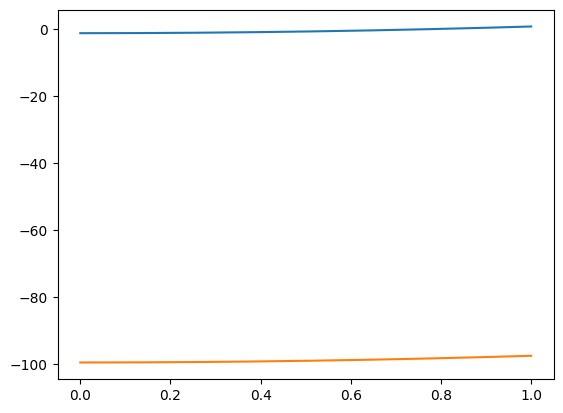

In [ ]:
a1 = 0.3
a2 = 0.99
x = np.linspace(0, 1, 1000)
y = 2*x**2 - (1 + a1**2)/(1 - a1**2)
y1 = 2*x**2 - (1 + a2**2)/(1 - a2**2)
plt.plot(x, y, label="a1")
plt.plot(x, y1, label="a2")



In [ ]:
k.polynomials()

print(k.polynomials()[0])


(nan+nanj) z^0 + (nan+nanj) z^1 + (nan+nanj) z^2 + (nan+nanj) z^3


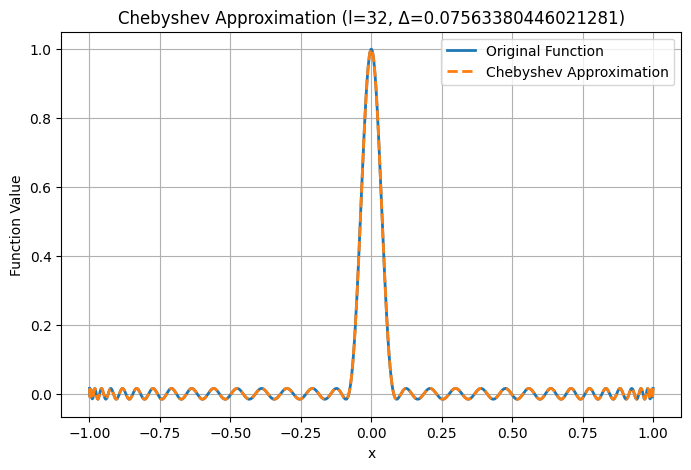

In [19]:
# Construct Chebyshev polynomial from coefficients
cheb_poly = Chebyshev(coefficients)

# Evaluate the Chebyshev polynomial
y_cheb_approx = cheb_poly(x_samples)

# Plot the original function and its Chebyshev approximation
plt.figure(figsize=(8, 5))
plt.plot(x_samples, y_samples, label="Original Function", linewidth=2)
plt.plot(x_samples, y_cheb_approx, label="Chebyshev Approximation", linestyle="--", linewidth=2)
plt.xlabel("x")
plt.ylabel("Function Value")
plt.title(f"Chebyshev Approximation (l={l}, Δ={delta_scaled})")
plt.legend()
plt.grid()
plt.show()

# print("Chebyshev Coefficients:", cheb_coeffs)

In [ ]:
# plot the output of qsp on against the x axis, on this plot above. 

In [ ]:
print(len(coefficients))
# if len(coefficients) % 2 != 0:
#     coefficients = np.append(coefficients, 0)
#     print("Adjusted coefficients length:", len(coefficients))

5


In [ ]:
len(coefficients)
coefficients

array([ 2.51315521e-02,  7.69217330e-18, -5.01786378e-02,  1.42139722e-17,
        4.99259332e-02,  1.27374435e-18, -4.95070669e-02,  2.22186696e-17,
        4.89254731e-02, -9.83820899e-18, -4.81859048e-02,  2.69027607e-17,
        4.72943794e-02, -2.28026284e-17, -4.62581106e-02,  2.99954140e-17,
        4.50854266e-02, -3.09214291e-17, -4.37856766e-02,  3.72815741e-17,
        4.23691258e-02, -3.71765245e-17, -4.08468414e-02,  4.06807371e-17,
        3.92305708e-02, -4.48631242e-17, -3.75326126e-02,  4.97694871e-17,
        3.57656836e-02, -4.17311617e-17, -3.39427834e-02,  5.45242718e-17,
        3.20770565e-02, -5.16250556e-17, -3.01816559e-02,  5.71768874e-17,
        2.82696096e-02, -5.15188923e-17, -2.63536897e-02,  6.55616290e-17,
        2.44462883e-02, -5.63015361e-17, -2.25593001e-02,  7.10152855e-17,
        2.07040136e-02, -6.03297029e-17, -1.88910122e-02,  6.59682456e-17,
        1.71300855e-02, -6.66407846e-17, -1.54301532e-02,  7.96444774e-17,
        1.37992011e-02, -

In [ ]:
from poly import Polynomial
from qsp import analytic_to_laurent, laurent_to_analytic, xqsp_solve
P = optpoly_eigenstatefiltering(x_range, 8, delta_scaled)
print('eigenstate filtering polynomial', P)
g = analytic_to_laurent(P,8)
# plt.plot(x_range, g)
# plt.title('Laurent polynomial')
# plt.xlabel('x') 

print('g', g)

test_laurent = Polynomial([3, 2, 5], support_start= -1)
print(test_laurent)

print(laurent_to_analytic(P, 8))
print(xqsp_solve(laurent_to_analytic(P, 8)).phase_offset())

NumpyBackend -- chosen dtypes: complex128, float64
eigenstate filtering polynomial [0.54656788 0.41175565 0.28837602 ... 0.28837602 0.41175565 0.54656788]
g (0.5465678828011695+0j) z^-8 + 0j z^-7 + (0.41175565287047855+0j) z^-6 + 0j z^-5 + (0.2883760229570106+0j) z^-4 + 0j z^-3 + (0.1758510870158842+0j) z^-2 + 0j z^-1 + (0.07362342835893404+0j) z^0 + 0j z^1 + (-0.018844429786083233+0j) z^2 + 0j z^3 + (-0.10207056210901345+0j) z^4 + 0j z^5 + (-0.17655416764116705+0j) z^6 + 0j z^7 + (-0.24277608496449263+0j) z^8
(3+0j) z^-1 + (2+0j) z^0 + (5+0j) z^1
(-0.17655416764104243+0j) z^0 + (-0.018844429785932256+0j) z^1 + (0.1758510870160745+0j) z^2 + (0.411755652870707+0j) z^3 + (0.5465678828011695+0j) z^4 + (0.2883760229570106+0j) z^5 + (0.07362342835893404+0j) z^6 + (-0.10207056210901345+0j) z^7 + (-0.24277608496449263+0j) z^8
Lcols [[np.complex128(nan+nanj), np.complex128(nan+nanj), np.complex128(nan+nanj), np.complex128(nan+nanj), np.complex128(nan+nanj), np.complex128(nan+nanj), np.complex1

/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/numerics/__init__.py:124: RuntimeWarning: invalid value encountered in log
  return __bd_wrapper.bd.log(x)
/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/riemann_hilbert.py:120: RuntimeWarning: invalid value encountered in scalar divide
  L_cols.append([upj/up[0] for upj in up])


In [ ]:
import numpy as np
from collections import defaultdict
from qsp import chebyshev_to_laurent

# class Polynomial:
#     def __init__(self, coeffs, support_start=0):
#         self.coeffs = coeffs
#         self.support_start = support_start
    
#     def __str__(self):
#         return ' + '.join(f"{c} z^{self.support_start + k}" for k, c in enumerate(self.coeffs))

# def chebyshev_to_laurent(coeffs):
#     """
#     Converts a Chebyshev expansion into a Laurent polynomial using the Polynomial class.
    
#     Args:
#         coeffs (list or array): Coefficients [c_0, c_1, ..., c_N] of the Chebyshev expansion,
#                                 where P(x) = sum c_n * T_n(x).
    
#     Returns:
#         Polynomial: A Laurent polynomial instance with the correct coefficients and support.
#     """
#     laurent_coeffs = defaultdict(lambda: 0)  # Dictionary to store Laurent coefficients
    
#     for n, c_n in enumerate(coeffs):
#         if c_n != 0:
#             laurent_coeffs[n] += c_n / 2  # Positive exponent term
#             if n > 0:
#                 laurent_coeffs[-n] += c_n / 2  # Negative exponent term
#             else:
#                 laurent_coeffs[0] += c_n  # T_0(x) = 1 contributes fully to z^0
    
    # # Convert dictionary to sorted coefficient list
    # min_exp = min(laurent_coeffs.keys())
    # max_exp = max(laurent_coeffs.keys())
    # ordered_coeffs = [laurent_coeffs[k] for k in range(min_exp, max_exp + 1)]
    
    # return Polynomial(ordered_coeffs, support_start=min_exp)

# Example usage:
# chebyshev_coeffs = [3, 2, 4]  # Represents 3T_0(x) + 2T_1(x) + 4T_2(x)
chebyshev_coeffs = coefficients

laurent_poly = chebyshev_to_laurent(chebyshev_coeffs)
print(laurent_poly)  # Expected output: Polynomial representing 3 + z + z^{-1} + 2z^2 + 2z^{-2}


(0.9667855431345325+0j) z^4 + (1.8443040410405039e-16+0j) z^5 + (-0.022121879976422405+0j) z^6 + (1.0186922341961828e-16+0j) z^7 + (0.01109257688904486+0j) z^8 + (1.0186922341961828e-16+0j) z^9 + (-0.022121879976422405+0j) z^10 + (1.8443040410405039e-16+0j) z^11 + (0.9667855431345325+0j) z^12


In [ ]:
c = coefficients
a = list(reversed(c[1:]))
print(a)
h = a+[c for c in coefficients]
print(h)
print(len(h))

[np.float64(0.9667855431345325), np.float64(1.8443040410405039e-16), np.float64(-0.022121879976422405), np.float64(1.0186922341961828e-16)]
[np.float64(0.9667855431345325), np.float64(1.8443040410405039e-16), np.float64(-0.022121879976422405), np.float64(1.0186922341961828e-16), np.float64(0.01109257688904486), np.float64(1.0186922341961828e-16), np.float64(-0.022121879976422405), np.float64(1.8443040410405039e-16), np.float64(0.9667855431345325)]
9


In [ ]:
# Example usage:
chebyshev_coeffs = [3, 2, 4]  # Represents 3T_0(x) + 2T_1(x) + 4T_2(x)
# chebyshev_coeffs = coefficients

laurent_poly = chebyshev_to_laurent(chebyshev_coeffs)
print(laurent_poly)  # Expected output: Polynomial representing 3 + z + z^{-1} + 2z^2 + 2z^{-2}

(4+0j) z^2 + (2+0j) z^3 + (3+0j) z^4 + (2+0j) z^5 + (4+0j) z^6


In [ ]:
from qsp import chebqsp_solve
# test_c = computeChebCoeffs(20, 20)
# chebqsp = chebqsp_solve(chebychv_coeffs)


In [ ]:
c = [1,2,3,4,5]
h = list(reversed(c[1:])) 
# print(c + h)
a=h+[0]
a.append(c)
print(a)

[5, 4, 3, 2, 0, [1, 2, 3, 4, 5]]


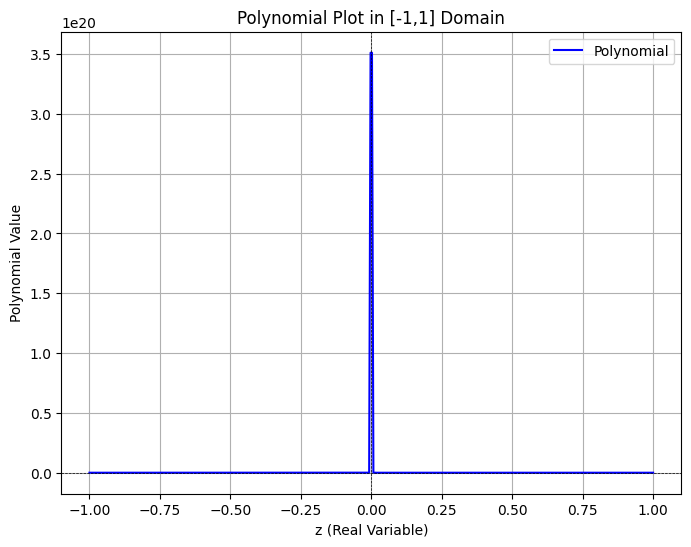

In [ ]:
# lau_poly = (0.5465678828011695+0j) z^-8 + 0j z^-7 + (0.41175565287047855+0j) z^-6 + 0j z^-5 + (0.2883760229570106+0j) z^-4 + 0j z^-3 + (0.1758510870158842+0j) z^-2 + 0j z^-1 + (0.07362342835893404+0j) z^0 + 0j z^1 + (-0.018844429786083233+0j) z^2 + 0j z^3 + (-0.10207056210901345+0j) z^4 + 0j z^5 + (-0.17655416764116705+0j) z^6 + 0j z^7 + (-0.24277608496449263+0j) z^8
# (3+0j) z^-1 + (2+0j) z^0 + (5+0j) z^1

# how do i plot the laurent polynomial?

# Define real variable range
z_real = np.linspace(-1, 1, 400)

# Compute polynomial values for real z
poly_values_real = (
    (0.5465678828011695) * z_real**-8 +
    (0.41175565287047855) * z_real**-6 +
    (0.2883760229570106) * z_real**-4 +
    (0.1758510870158842) * z_real**-2 +
    (0.07362342835893404) +
    (-0.018844429786083233) * z_real**2 +
    (-0.10207056210901345) * z_real**4 +
    (-0.17655416764116705) * z_real**6 +
    (-0.24277608496449263) * z_real**8 +
    (3) * z_real**-1 +
    (2) * z_real +
    (5) * z_real**1
)

# Plot polynomial over real domain (-1,1)
plt.figure(figsize=(8, 6))
plt.plot(z_real, poly_values_real, label="Polynomial", color='b')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel("z (Real Variable)")
plt.ylabel("Polynomial Value")
plt.title("Polynomial Plot in [-1,1] Domain")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from qsp import chebqsp_solve
import numpy as np

chebqsp = chebqsp_solve(coefficients)

/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/numerics/__init__.py:126: RuntimeWarning: invalid value encountered in log
  return __bd_wrapper.bd.log(x)
/Users/jgh407/Documents/github/nlft-qsp/nlft_qsp/riemann_hilbert.py:120: RuntimeWarning: invalid value encountered in scalar divide
  L_cols.append([upj/up[0] for upj in up])


In [ ]:
c = [0.5, 0.0, 0.2, 0.0, 0.1]  # does not work 
c2 = [0.5, 0.0, 0.2] # works, even degree poly 
c3 = [0.0, 0.3]  # Coefficients for T₁ (no T₀, T₂), works 
c4 = [0, 0.99]
ch = chebqsp_solve(coefficients)
print(ch.polynomials()[0])
print(ch.polynomials()[1])
print(ch.degree())
print(ch.phi)

ValueError: The given polynomial cannot be too close to one on the unit circle.

In [ ]:
from qsp import PhaseFactors
print(coefficients)
f = PhaseFactors(coefficients, )
print(f.polynomials()[0])
print(f.polynomials()[1])
print((f.phi))
print(f.theta)



[ 1.10925769e-02  1.01869223e-16 -2.21218800e-02  1.84430404e-16
  9.66785543e-01]
(-0.009127483217891568+0j) z^0 + (-6.579290463499177e-17+0j) z^1 + (0.018344478872402543+0j) z^2 + (-1.2849612467441063e-16+0j) z^3 + (0.567774267958434+0j) z^4
0.006298338051954513j z^0 + 5.848062789999035e-17j z^1 + -0.012360333477031814j z^2 + 1.1195595361473095e-16j z^3 + 0.82281231327891j z^4
[np.float64(0.01109257688904486), np.float64(1.0186922341961828e-16), np.float64(-0.022121879976422405), np.float64(1.8443040410405039e-16), np.float64(0.9667855431345325)]
[0, 0, 0, 0, 0]


In [ ]:

chebqsp.polynomials()
print(chebqsp.polynomials())
print(chebqsp.polynomials()[0])
print(chebqsp.polynomials()[1])


   



(<poly.Polynomial object at 0x131f27140>, <poly.Polynomial object at 0x131f996a0>)
(nan+nanj) z^0 + (nan+nanj) z^1 + (nan+nanj) z^2 + (nan+nanj) z^3 + (nan+nanj) z^4 + (nan+nanj) z^5 + (nan+nanj) z^6 + (nan+nanj) z^7 + (nan+nanj) z^8 + (nan+nanj) z^9 + (nan+nanj) z^10 + (nan+nanj) z^11 + (nan+nanj) z^12
(nan+nanj) z^0 + (nan+nanj) z^1 + (nan+nanj) z^2 + (nan+nanj) z^3 + (nan+nanj) z^4 + (nan+nanj) z^5 + (nan+nanj) z^6 + (nan+nanj) z^7 + (nan+nanj) z^8 + (nan+nanj) z^9 + (nan+nanj) z^10 + (nan+nanj) z^11 + (nan+nanj) z^12


In [26]:
from qsp import xqsp_solve_laurent, xqsp_solve
import numpy as np
from rand import random_real_polynomial

P = random_real_polynomial(16, eta=0.5)    

print(P)

qsp = xqsp_solve(1j*P, mode='qsp')
print(qsp.phi)
print(qsp.theta)
print(qsp.polynomials()[0])
print(qsp.polynomials()[1])






(0.05535297917830942+0j) z^0 + (0.05365842181329805+0j) z^1 + (0.05299447337684252+0j) z^2 + (0.03058670858502018+0j) z^3 + (0.06277363465910459+0j) z^4 + (0.018955565479408295+0j) z^5 + (0.016583097404199516+0j) z^6 + (0.03658375312877355+0j) z^7 + (0.013225083309392522+0j) z^8 + (0.03097442403527076+0j) z^9 + (0.0019100714288038771+0j) z^10 + (0.01488030720343618+0j) z^11 + (0.021586537835246854+0j) z^12 + (0.005804450664024781+0j) z^13 + (0.04772129259152694+0j) z^14 + (0.036409199307342065+0j) z^15


ValueError: The phase factors are not reducible to X-constrained QSP.